The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following:

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Sex: Sex
Age: Age in years
Sibsp: # of siblings / spouses aboard the Titanic
Parch: # of parents / children aboard the Titanic
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
Target class: Survived: Survival (0 = No, 1 = Yes)


IMPORT LIBRARIES

In [2]:
#Import importat liraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

LOAD DATASET

In [3]:
#load dataset
training_data = pd.read_csv('Train_Titanic.csv')

In [4]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
training_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#Count the dataset 
len(training_data)

891

In [7]:
#number of survived and non-survived
survived = training_data[training_data['Survived'] ==1]
not_survived= training_data[training_data['Survived'] ==0]

In [19]:
#count the survived
len(survived)

342

In [20]:
#count those that did not survive
len(not_survived)

549

In [21]:
print("Total =", len(training_data))
print("Number survived =", len(survived))
print("Did not survive =", len(not_survived))

Total = 891
Number survived = 342
Did not survive = 549


In [22]:
training_set = training_data.copy()

DATA VISUALISATION

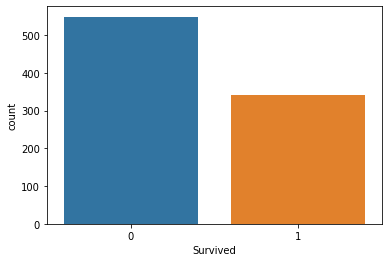

In [23]:
# Visual representation of survived and non-survived
sns.countplot(x= 'Survived', data = training_set)

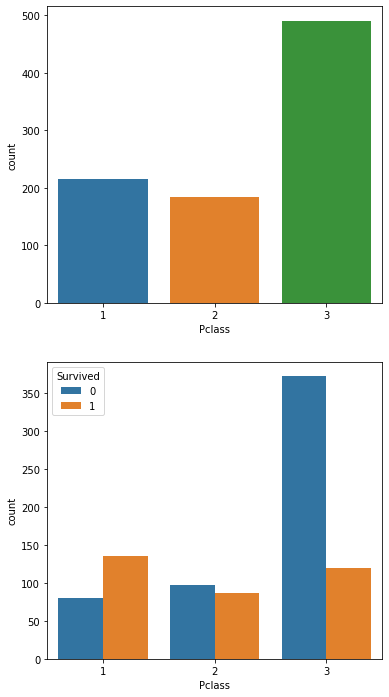

In [27]:
#chart showing number of people that survived based on their ticket class
plt.figure (figsize= [6,12])
plt.subplot(211)
sns.countplot(x= 'Pclass', data = training_set)
plt.subplot(212)
sns.countplot(x= 'Pclass', hue = 'Survived', data = training_set)

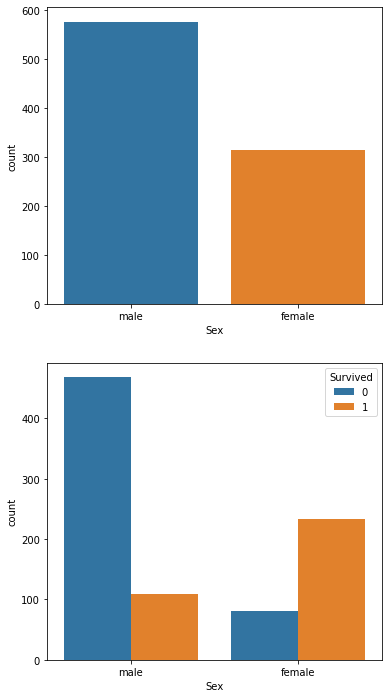

In [28]:
#chart showing number of people that survived based on their sex(gender)
plt.figure (figsize= [6,12])
plt.subplot(211)
sns.countplot(x= 'Sex', data = training_set)
plt.subplot(212)
sns.countplot(x= 'Sex', hue = 'Survived', data = training_set)

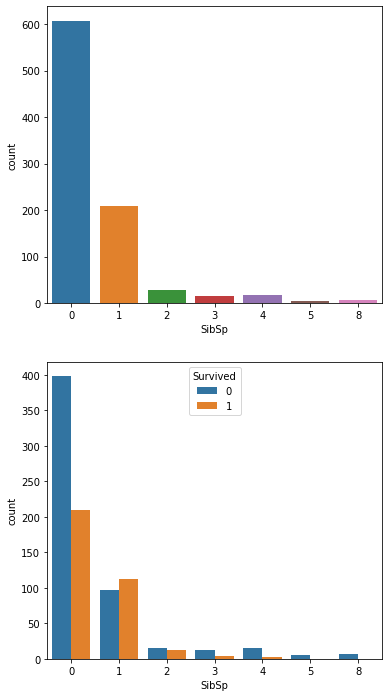

In [30]:
#chart showing number of people that survived based on number of siblings/spouse
plt.figure (figsize= [6,12])
plt.subplot(211)
sns.countplot(x= 'SibSp', data = training_set)
plt.subplot(212)
sns.countplot(x= 'SibSp', hue = 'Survived', data = training_set)

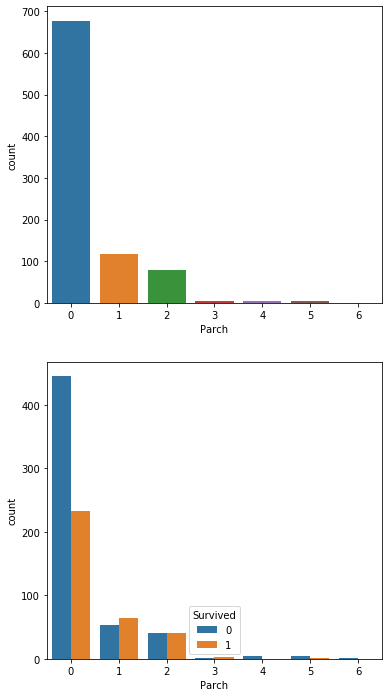

In [31]:
#chart showing number of people that survived based on number of parents and children on board
plt.figure (figsize= [6,12])
plt.subplot(211)
sns.countplot(x= 'Parch', data = training_set)
plt.subplot(212)
sns.countplot(x= 'Parch', hue = 'Survived', data = training_set)

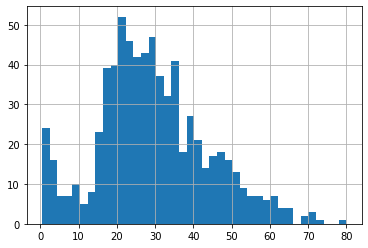

In [46]:
# histogram showing age
training_set['Age'].hist(bins = 40)

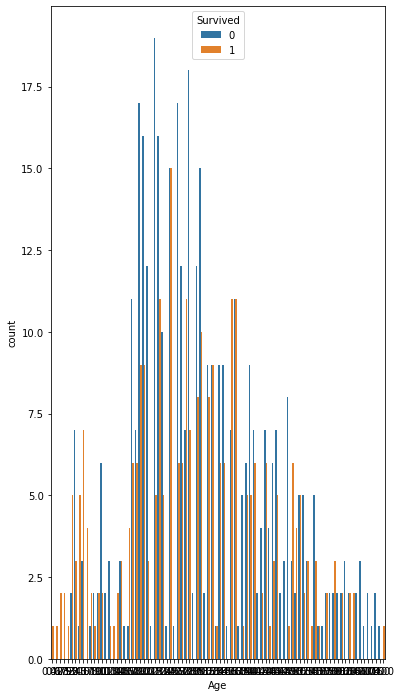

In [47]:
#chart showing number of people that survived based on their age
plt.figure (figsize= [6,12])
sns.countplot(x= 'Age', hue = 'Survived', data = training_set)

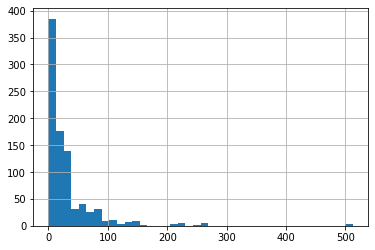

In [44]:
#Histogram showing fare
training_set['Fare'].hist(bins= 40)

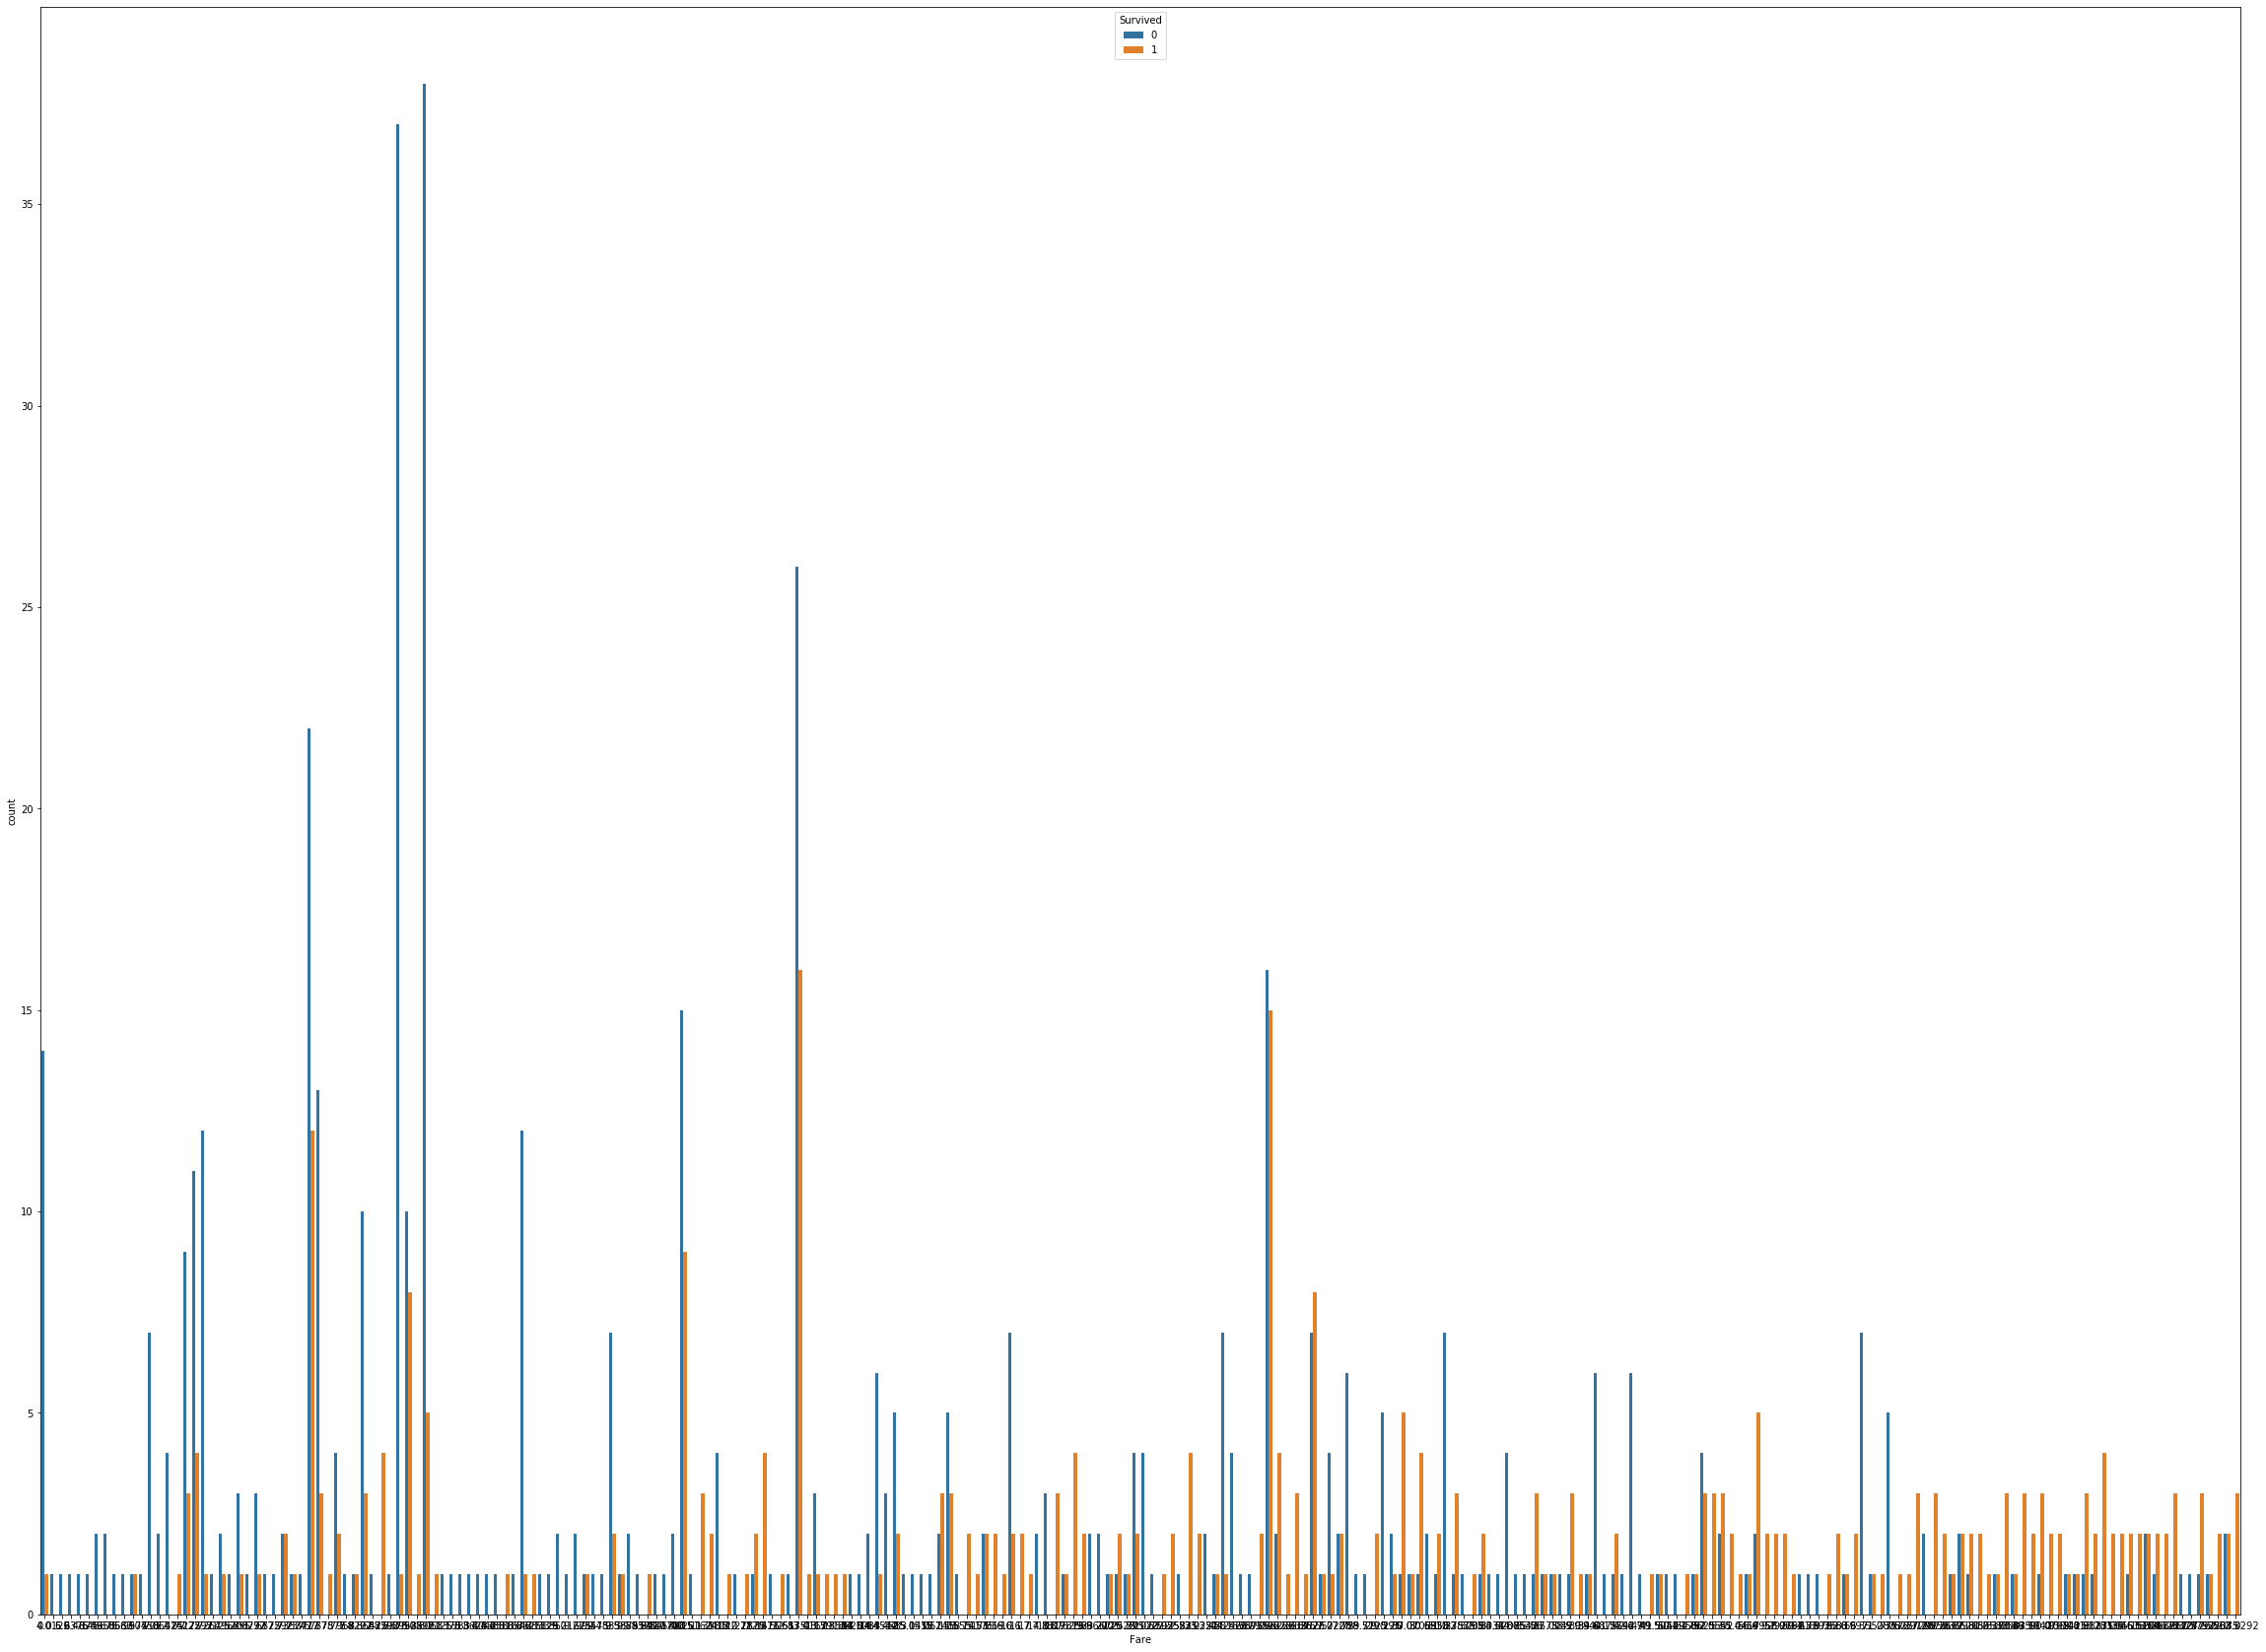

In [45]:
#chart showing number of people that survived based on fare price
plt.figure (figsize= [40,30])
sns.countplot(x= 'Fare', hue = 'Survived', data = training_set)

In [42]:
#checking for missing values
training_set.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

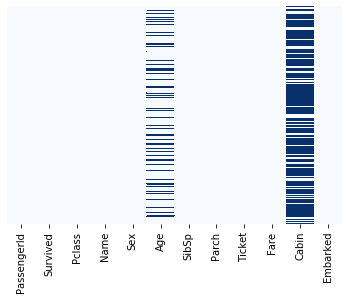

In [39]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [41]:
#drop columns 
training_set.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'PassengerId'], axis=1, inplace= True)

In [48]:
training_set.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


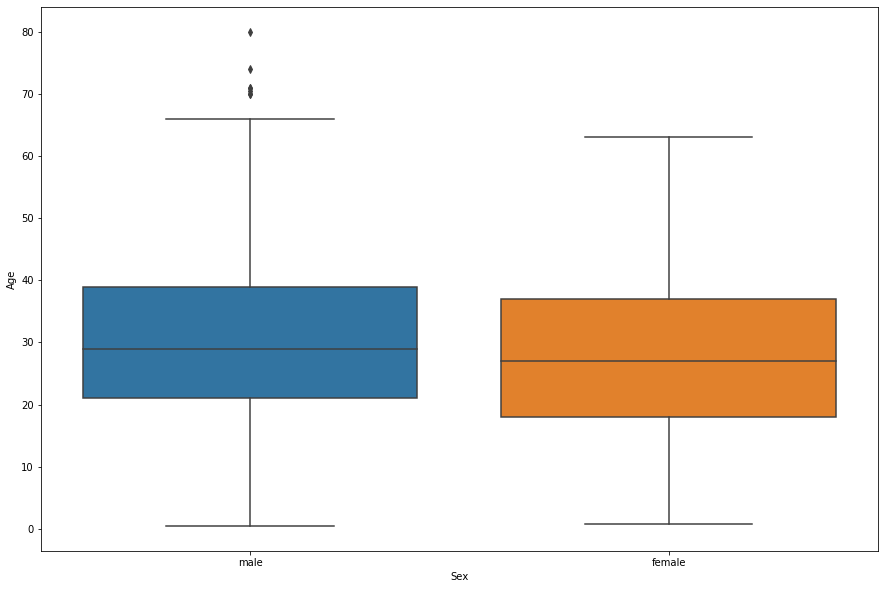

In [49]:
#boxplot for age and sex showing their average 
plt.figure(figsize=(15, 10))
sns.boxplot(x='Sex', y='Age',data=training_set)

In [51]:
# filling the missing values in age 
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex is 'male': 
            return 29
        else:
            return 25
    else:
        return age

In [52]:
training_set['Age'] = training_set[['Age','Sex']].apply(Fill_Age,axis=1)

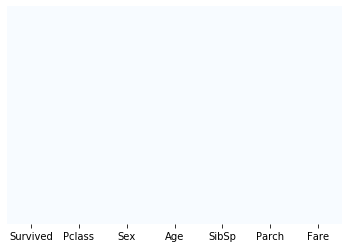

In [53]:
#exploring checking if all missing values have been fixed 
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [54]:
pd.get_dummies(training_set['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [55]:
male = pd.get_dummies(training_set['Sex'], drop_first = True)

In [57]:
training_set.drop(['Sex'], axis=1, inplace=True)

In [60]:
training_set = pd.concat([training_set, male], axis=1)

In [61]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [64]:
# output and input
X= training_set.drop(['Survived'],axis=1).values
y= training_set['Survived'].values

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 10)

In [69]:
#model training
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 10)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [70]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

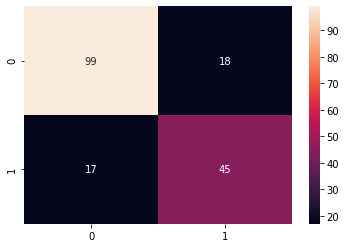

In [71]:
#result
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179

